In [1]:
import pandas as pd
import numpy as np

In [2]:
# Считываем раблицу за 1880 год и выводим количество родившихся мальчиков и девочек
year_1880 = pd.read_table('C:\\Users\\tosha\\libraries\\master\\babynames\\yob1880.txt', sep=',', names=['Name', 'Gender', 'UserID'], engine='python')
year_1880['Gender'].value_counts()

M    1058
F     942
Name: Gender, dtype: int64

In [3]:
# Считываем все таблицы и преобразуем её в одну, предварительно добавив столбец 'year'
a = []
for year in range(1880, 2011):
    df = pd.read_table('C:\\Users\\tosha\\libraries\\master\\babynames\\yob%d.txt'%year, sep=',', names=['name', 'sex', 'ID'], engine='python')
    df['year'] = year
    a.append(df)
    data = pd.concat(a, ignore_index=True)
data

,name,sex,ID,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


<AxesSubplot:xlabel='year'>

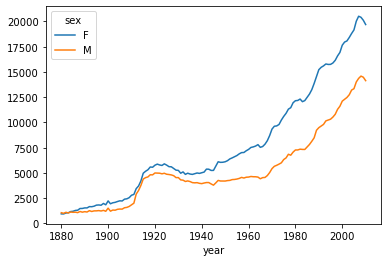

In [4]:
# График рождаемости по полу
count_FM_on_year = pd.pivot_table(data, values='name', index='year', columns='sex', aggfunc='count')
count_FM_on_year.plot()

In [15]:
# data с столбиком 'proportion'
proportion_names = data.groupby('name').agg({'name': 'count'})
proportion_names['count'] = proportion_names['name']
proportion_names = proportion_names.drop(labels='name', axis=1)

all_names = proportion_names['count'].count()
proportion_names['proportion'] = proportion_names['count'] / all_names

data = pd.merge(data, proportion_names, on='name')
data

,name,sex,ID,year,count,proportion
0,Mary,F,7065,1880,259,0.002927
1,Mary,M,27,1880,259,0.002927
2,Mary,F,6919,1881,259,0.002927
3,Mary,M,29,1881,259,0.002927
4,Mary,F,8149,1882,259,0.002927
...,...,...,...,...,...,...
1690779,Zmari,M,5,2010,1,0.000011
1690780,Zyeire,M,5,2010,1,0.000011
1690781,Zymaire,M,5,2010,1,0.000011
1690782,Zyonne,M,5,2010,1,0.000011


<AxesSubplot:xlabel='name'>

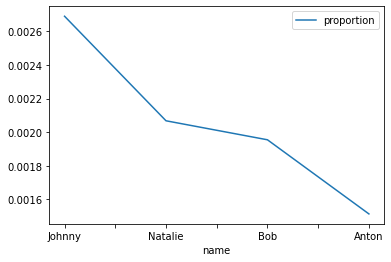

In [7]:
# График частоты данных имён относительно общего количества
proportion_names.loc[['Johnny', 'Natalie', 'Bob', 'Anton'], ['proportion']].plot()

In [89]:
# популярные имена в каждом году
count_names = data.groupby(['year', 'name']).agg({'name': 'count'})
count_names['count'] = count_names['name']
count_names = count_names.drop(labels='name', axis=1)

# После проверки count_names[count_names['count'] > 2] становится понятно, что 2 самое большое число в нашей таблице. Тогда самые популярные имена:
popular_names = count_names[count_names['count'] == 2]
popular_names

count
year name        
1880 Addie      2
     Allie      2
     Alma       2
     Alpha      2
     Alva       2
...           ...
2010 Zyan       2
     Zyian      2
     Zyien      2
     Zyion      2
     Zyon       2

[150767 rows x 1 columns]